## - 불러올 패키지 목록

In [1]:
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.formula.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침

# 분산분석 관련 패키지
import scikit_posthocs as sp  # 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd    # 사후검정
from statsmodels.sandbox.stats.multicomp import MultiComparison    # MultiComparison을 활용한 사후검정 시 사용
from statsmodels.graphics.factorplots import interaction_plot    # 상호작용효과 그래프 출력 시 사용

# 요인분석을 위한 패키지
from factor_analyzer import FactorAnalyzer

# 시계열 관련 statsmodels 패키지
from statsmodels.tsa.api import *
from statsmodels.tsa.ar_model import *
from statsmodels.tsa.arima.model import *
from statsmodels.tsa.arima_process import *
from statsmodels.tsa.statespace import *
from statsmodels.graphics.api import *
from statsmodels.graphics.tsaplots import * 

# SciPy 패키지
import scipy
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공
from sklearn.multiclass import OneVsRestClassifier  # multiclass 분류기 알고리즘 제공
from sklearn.pipeline import *

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # 변수선택 알고리즘 포함
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False
#
#

# 일원 분산분석 (one-way ANOVA)

In [2]:
df = pd.read_csv(r'C:\Users\Boanerges\GitHub\rawdata\Harvest.csv')

df = df.drop('ID', axis = 1)
df

,Fertil,Yield
0,F1,148
1,F1,76
2,F1,134
3,F1,98
4,F2,166
5,F2,153
6,F2,255
7,F3,264
8,F3,214
9,F3,327


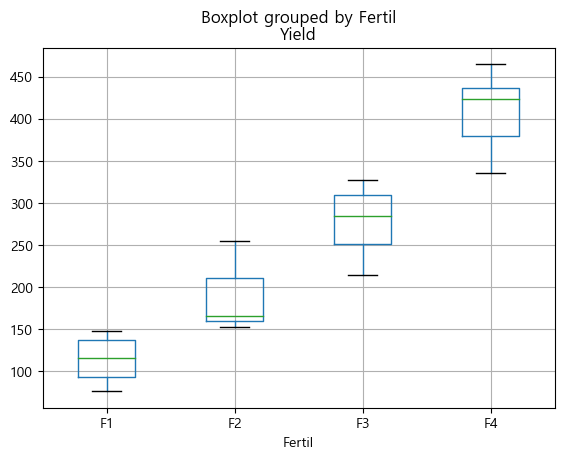

In [3]:
df.boxplot('Yield', by='Fertil')
plt.show()

## 일원분류 분산분석의 가정 확인

1. 독립 표본 가정 : 각 집단 간의 자료는 독립이다.
2. 정규성 : 각 집단의 자료는 정규분포를 따른다.
3. 등분산성 : 각 집단의 모분산은 동일하다.

- 위의 가정을 만족하지 않는 경우 비모수 검정을 선택하는 것이 타당하다.

### 정규성 검정

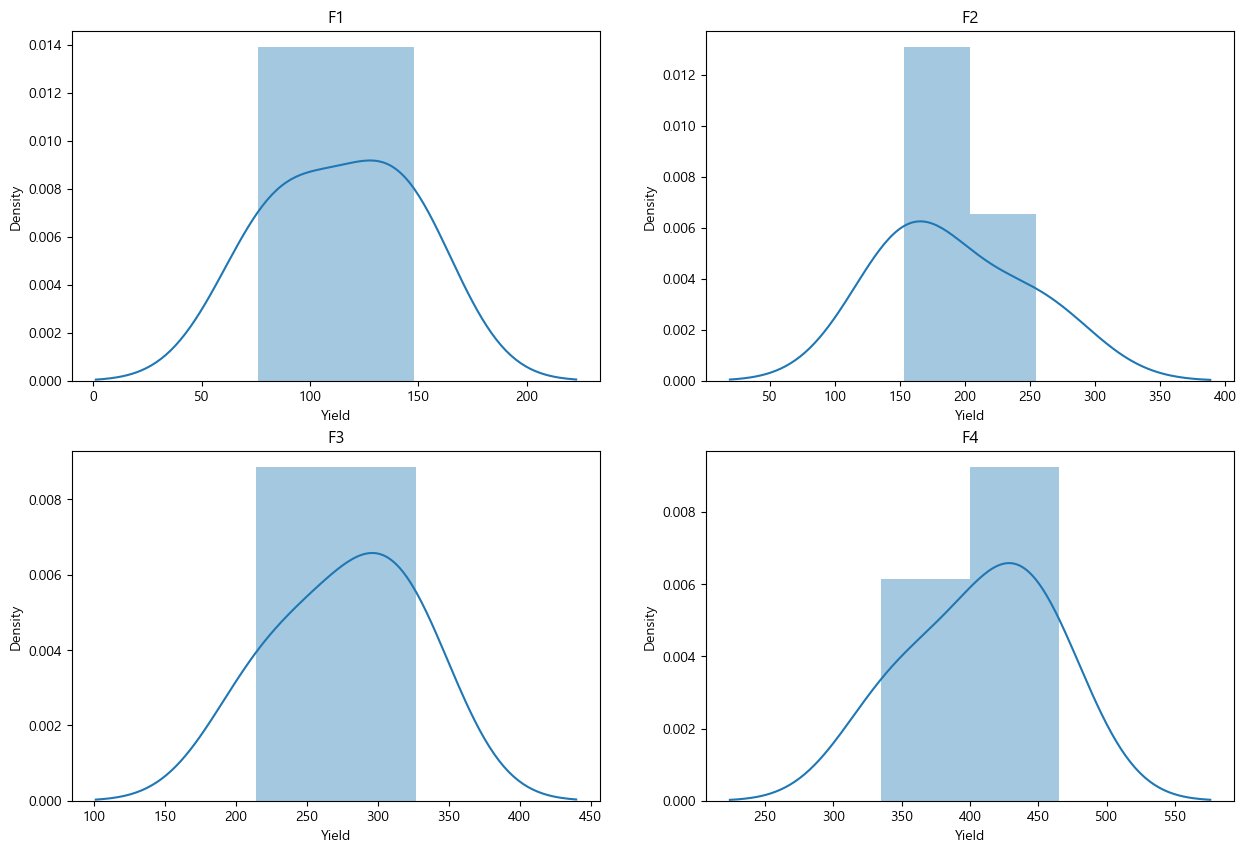

In [4]:
# 데이터 분포 확인 (distplot())

plt.figure(figsize=(15,10))

a = ['F1', 'F2', 'F3', 'F4']

for i, j in enumerate(a):
    plt.subplot( 2, 2, 1+i )
    plt.title(j)
    sb.distplot( df[ df['Fertil']==j]['Yield'], kde = True )    

#### Shapiro-Wilk normality test

In [5]:
# shapiro test
a = ['F1', 'F2', 'F3', 'F4']

for i in a:
    print(i, stats.shapiro( df[ df['Fertil']==j]['Yield']) )

F1 ShapiroResult(statistic=0.9626894593238831, pvalue=0.8265766501426697)
F2 ShapiroResult(statistic=0.9626894593238831, pvalue=0.8265766501426697)
F3 ShapiroResult(statistic=0.9626894593238831, pvalue=0.8265766501426697)
F4 ShapiroResult(statistic=0.9626894593238831, pvalue=0.8265766501426697)


### 등분산 검정

< 가설 설정 - 등분산성 검정 >
- 귀무가설(H0) : 세 집단의 분산이 동일하다.
- 대립가설(H1) : 적어도 한 집단의 분산이 동일하지 않다.

※ 정규성을 가정할 수 없을 때에는 Levene 검정을 사용하는 것이 좋지만,  
정규성이 확실하다면 Bartlett 검정을 사용하는 것이 정확하다.

In [6]:
f1 = df[ df.Fertil == 'F1'].Yield
f2 = df[ df.Fertil == 'F2'].Yield
f3 = df[ df.Fertil == 'F3'].Yield
f4 = df[ df.Fertil == 'F4'].Yield

#### Bartlett's Test

In [7]:
# scipy.stats.bartlett( sample1, sample2,… )

bartlett_test = stats.bartlett( f1, f2, f3, f4 )
print( f" Statistic(Bartlett's test): {bartlett_test[0]:.3f} \n P-value: {bartlett_test[1]:.12f} " )

if bartlett_test[1] < 0.05:
    print(" p-value < 0.05 이므로 귀무가설 기각. 등분산성을 만족하지 않는다.")
if bartlett_test[1] > 0.05:
    print(" p-value > 0.05 이므로 귀무가설 채택. 등분산성을 만족한다.")
print()

 Statistic(Bartlett's test): 0.695 
 P-value: 0.874300488751 
 p-value > 0.05 이므로 귀무가설 채택. 등분산성을 만족한다.



## 일원 분산분석

< 가설 설정 - ANOVA >
- 귀무가설(H0) : 네 가지 비료의 수확량의 평균은 같다.
- 대립가설(H1) : 적어도 하나 이상의 비료에 대한 수확량 평균값에는 차이가 있다.

In [8]:
df.groupby('Fertil').agg({'Yield':['mean', 'std', 'min', 'max']}).round(3)

Yield                  
           mean     std  min  max
Fertil                           
F1      114.000  32.944   76  148
F2      191.333  55.519  153  255
F3      277.250  49.554  214  327
F4      407.800  50.919  335  465

### `ols()`, `anova_lm()` - statsmodels

- [ 중요!! ] 적합된 선형회귀모델의 결과를 이용해야 함

- typ : The type of Anova test to perform.
  - [ 주의 ] 이원 분산분석에서는 typ 옵션 값에 따라서 출력되는 결과도 달라질 수 있음. 
  - typ=1 : sequential SS. 모형에 삽입된 요인 순서대로 제곱합 출력 ( SS(A) - SS(B|A) - SS(AB|A,B) )
  - typ=2 : 상호작용 없이 주효과만을 검정 ( SS(A|B), SS(B|A) )
  - typ=3 : partial SS. 비균형설계자료(집단별 표본수가 동일하지 않음)인 경우에 사용. ( SS(A|B,AB), SS(B|A,AB), SS(AB,A|B) )   
  - 균형설계자료(집단별 표본수가 동일)인 경우 또는 일원 분산분석에서는 typ=1,2,3 모두 동일한 F통계량 및 p값을 산출한다.

- [ 참고 ]
  - "SS(A|B)"는 B에 대해 알려진 내용이 주어지면 A를 테스트하는 것을 의미함.
  - "SS(B|A)"는 A에 대해 알려진 내용이 주어지면 B를 테스트하는 것을 의미함.
  - "SS(AB|A, B)"는 A와 B에 대해 개별적으로 알려진 것이 주어졌을 때 AB 상호작용을 테스트하는 것을 의미함.

In [9]:
# 회귀모델 생성 및 적합
fit_model = ols( 'Yield ~ Fertil', data = df ).fit()

# 분산분석 수행
display( anova_lm(fit_model, typ=1) )
print()

,df,sum_sq,mean_sq,F,PR(>F)
Fertil,3.0,209803.533333,69934.511111,30.900929,0.000006
Residual,12.0,27158.216667,2263.184722,NaN,NaN


## 사후 검정

### Pairwise T-test

In [10]:
# 다중비교
comp = MultiComparison( df.Yield,
                        groups = df.Fertil )

# Bonferroni 방법을 통해 모든 그룹간 ttest를 진행
result = comp.allpairtest(stats.ttest_ind, method='bonf')

result[0]  # [0] 을 붙여야 데이터프레임 형식으로 출력됨. (이유는 모름.)

group1,group2,stat,pval,pval_corr,reject
F1,F2,-2.3327,0.067,0.4019,False
F1,F3,-5.4869,0.0015,0.0092,True
F1,F4,-9.9265,0.0,0.0001,True
F2,F3,-2.1624,0.0829,0.4976,False
F2,F4,-5.6462,0.0013,0.0079,True
F3,F4,-3.8661,0.0062,0.037,True


### Tukey's HSD (Honest Significant Difference) test
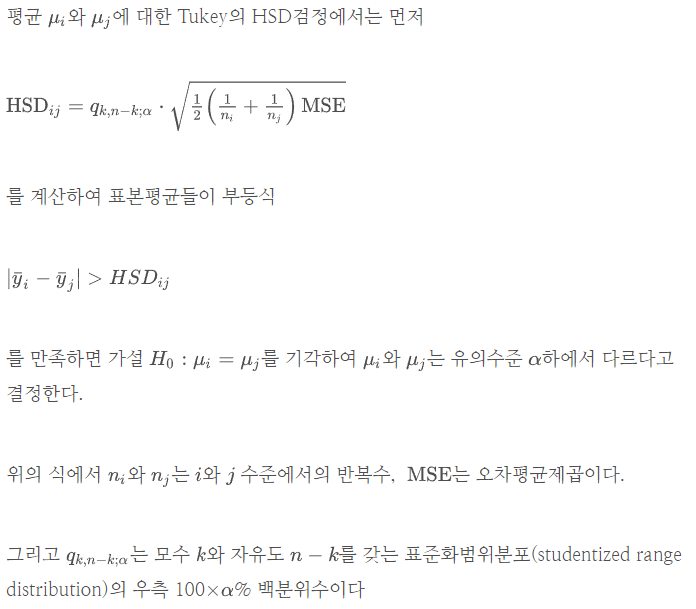

In [11]:
# 다중비교
comp = MultiComparison( df.Yield,
                        groups = df.Fertil )

# tukeyhsd 방법을 통해 다중비교 결과를 출력
result = comp.tukeyhsd()

result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
F1,F2,77.3333,0.1992,-30.5527,185.2194,False
F1,F3,163.25,0.0019,63.367,263.133,True
F1,F4,293.8,0.001,199.0426,388.5574,True
F2,F3,85.9167,0.1376,-21.9694,193.8027,False
F2,F4,216.4667,0.001,113.3079,319.6254,True
F3,F4,130.55,0.0071,35.7926,225.3074,True


# =================================

# 이원 분산분석 (two-way ANOVA)

## 반복이 없는 경우 (상호작용 없음)

- 인자(factor) 간의 상호작용(교호작용)이 없다고 생각되는 경우, 즉 A와 B가 독립인 경우에는 반복이 없는 실험을 한다.

- 인자(factor) 간의 상호작용(교호작용)이 있다고 판단 될 때에는 반복이 있는 실험을 한다.

- 상호작용(interaction)은 독립변수 사이에 상호 작용을 하여 서로의 작용에 영향을 주는 것을 말한다.

In [12]:
df = pd.read_csv(r'C:\Users\Boanerges\GitHub\rawdata\usage.csv')
df

,Customer,Product,Prefer
0,1,A1,5
1,1,A2,2
2,1,A3,4
3,1,A4,6
4,2,A1,7
5,2,A2,3
6,2,A3,7
7,2,A4,4
8,3,A1,9
9,3,A2,4


In [13]:
df.groupby('Customer').agg( {'Prefer' : [ 'mean', 'std', 'min', 'max' ] } )

Prefer                  
           mean       std min max
Customer                         
1          4.25  1.707825   2   6
2          5.25  2.061553   3   7
3          5.25  2.986079   2   9
4          5.50  3.316625   2  10
5          4.50  3.511885   1   8

In [14]:
df.groupby('Product').agg( {'Prefer' : [ 'mean', 'std', 'min', 'max' ] } )

Prefer                  
          mean       std min max
Product                         
A1         7.8  1.923538   5  10
A2         3.2  1.303840   2   5
A3         5.8  1.303840   4   7
A4         3.0  2.000000   1   6

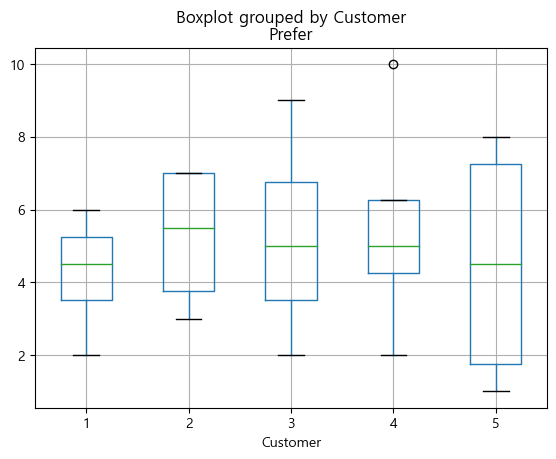

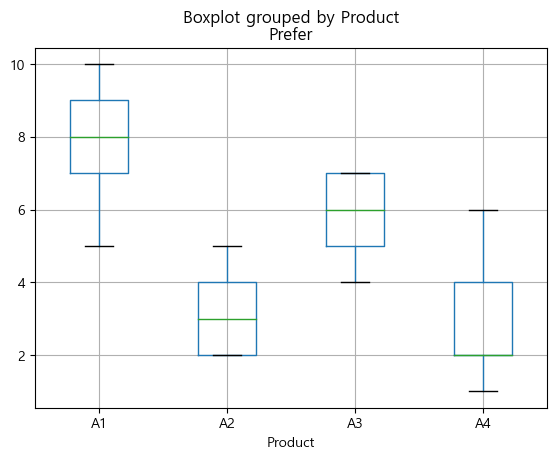

In [15]:
df.boxplot('Prefer', by='Customer')
df.boxplot('Prefer', by='Product')
plt.show()

### 상호작용이 없는 이원 분산분석


< 가설 설정 - ANOVA >

- 귀무가설(H0) : 제품에 따른 선호도의 평균은 같다.
- 대립가설(H1) : 적어도 하나 이상의 제품에 대한 선호도는 나머지와 차이가 있다.


- 귀무가설(H0) : 소비자에 따른 선호도의 평균은 같다.
- 대립가설(H1) : 적어도 한명 이상의 소비자에 대한 선호도는 다른 소비자와 차이가 있다.

In [16]:
# 회귀모델 생성 및 적합
fit_model = ols( 'Prefer ~ Customer+C(Product)', data = df ).fit()

# 분산분석 수행
anova_lm(fit_model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(Product),3.0,78.550,26.183333,8.890775,0.001257
Customer,1.0,0.225,0.225000,0.076401,0.786008
Residual,15.0,44.175,2.945000,NaN,NaN


### 사후 검정

In [17]:
# 다중비교
comp = MultiComparison( df.Prefer,
                        groups = df.Product )

# tukeyhsd 방법을 통해 다중비교 결과를 출력
result = comp.tukeyhsd()

result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A1,A2,-4.6,0.0024,-7.6145,-1.5855,True
A1,A3,-2.0,0.2676,-5.0145,1.0145,False
A1,A4,-4.8,0.0017,-7.8145,-1.7855,True
A2,A3,2.6,0.1039,-0.4145,5.6145,False
A2,A4,-0.2,0.9,-3.2145,2.8145,False
A3,A4,-2.8,0.0735,-5.8145,0.2145,False


## 반복이 있는 경우 (상호작용 있음)

- 인자(factor) 간의 상호작용(교호작용)이 없다고 생각되는 경우, 즉 A와 B가 독립인 경우에는 반복이 없는 실험을 한다.

- 인자(factor) 간의 상호작용(교호작용)이 있다고 판단 될 때에는 반복이 있는 실험을 한다.

- 상호작용(interaction)은 독립변수 사이에 상호 작용을 하여 서로의 작용에 영향을 주는 것을 말한다.

In [18]:
df = pd.read_csv(r'C:\Users\Boanerges\GitHub\rawdata\market.csv')
df

,ID,City,Design,Sales
0,1,Large,A,23
1,2,Large,A,20
2,3,Large,A,21
3,4,Large,B,22
4,5,Large,B,19
5,6,Large,B,20
6,7,Large,C,19
7,8,Large,C,18
8,9,Large,C,21
9,10,Middle,A,22


In [19]:
df.groupby('City').agg( {'Sales' : [ 'mean', 'std', 'min', 'max' ] } )

Sales                  
             mean       std min max
City                               
Large   20.333333  1.581139  18  23
Middle  21.444444  2.127858  19  25
Small   20.222222  2.587362  16  24

In [20]:
df.groupby('Design').agg( {'Sales' : [ 'mean', 'std', 'min', 'max' ] } )

Sales                  
             mean       std min max
Design                             
A       19.666667  2.179449  16  23
B       21.777778  1.986063  19  25
C       20.555556  1.878238  18  24

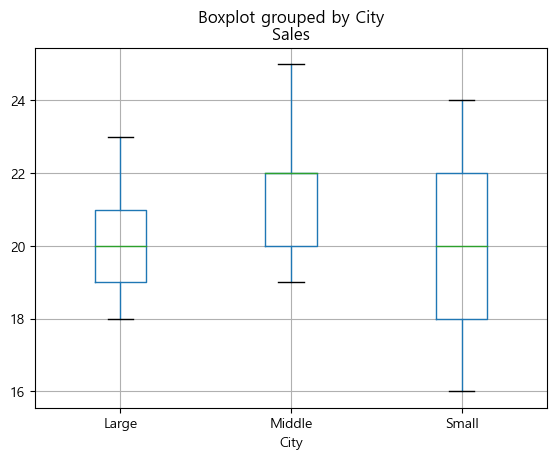

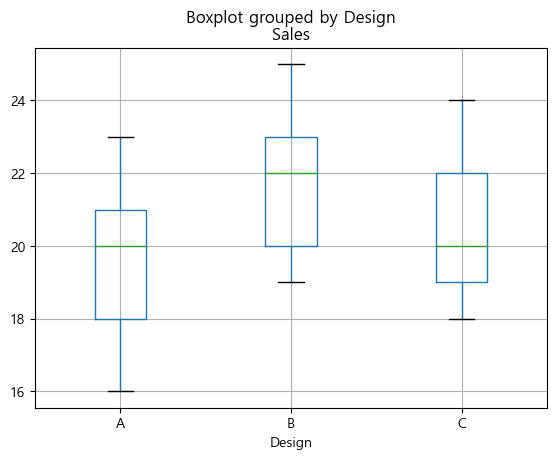

In [21]:
df.boxplot('Sales', by='City')
df.boxplot('Sales', by='Design')
plt.show()

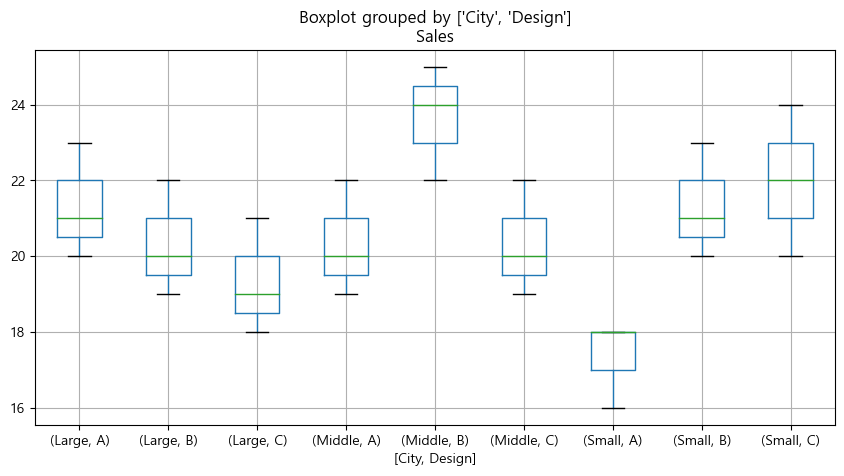

In [22]:
df.boxplot('Sales', by=['City', 'Design'],
           figsize=(10, 5) )
plt.show()

### 상호작용이 있는 이원 분산분석

< 가설 설정 - ANOVA >

1. 주효과 검정에 대한 가설  
a. 귀무가설(H0) : 도시 크기에 따른 판매량 차이는 존재하지 않는다.  
a. 대립가설(H1) : 도시 크기에 따른 판매량 차이가 존재한다.  
b. 귀무가설(H0) : 디자인 종류에 따른 판매량 차이는 존재하지 않는다.  
b. 대립가설(H1) : 디자인 종류에 따른 판매량 차이가 존재한다.

2) 상호작용효과 검정에 대한 가설
- 귀무가설(H0) : 도시 크기와 디자인 간에는 상호작용 효과가 없다.
- 대립가설(H1) : 도시 크기와 디자인 간에는 상호작용 효과가 있다.

< 유의수준은 0.05 로 설정 >

In [23]:
# 회귀모델 생성 및 적합
fit_model = ols( 'Sales ~ City + Design + City:Design', data = df ).fit()

# 분산분석 수행
anova_lm(fit_model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
City,2.0,8.222222,4.111111,1.707692,0.209372
Design,2.0,20.222222,10.111111,4.200000,0.031843
City:Design,4.0,46.222222,11.555556,4.800000,0.008208
Residual,18.0,43.333333,2.407407,NaN,NaN


### 사후 검정

In [24]:
# 다중비교
comp = MultiComparison( df.Sales,
                        groups = df.Design )

# tukeyhsd 방법을 통해 다중비교 결과를 출력
result = comp.tukeyhsd()

result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,2.1111,0.0881,-0.2646,4.4868,False
A,C,0.8889,0.6181,-1.4868,3.2646,False
B,C,-1.2222,0.4188,-3.5979,1.1535,False


In [25]:
# 다중비교
comp = MultiComparison( df.Sales,
                        groups = df.Design )

# Bonferroni 방법을 통해 모든 그룹간 ttest를 진행
result = comp.allpairtest(stats.ttest_ind, method='bonf')

result[0]  # [0] 을 붙여야 데이터프레임 형식으로 출력됨. (이유는 모름.)

group1,group2,stat,pval,pval_corr,reject
A,B,-2.1479,0.0474,0.1422,False
A,C,-0.9269,0.3678,1.0,False
B,C,1.3414,0.1985,0.5956,False


### 상호작용 확인

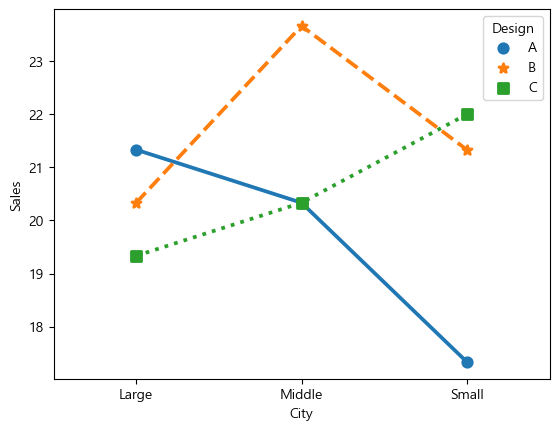

In [26]:
sb.pointplot( data = df,
              x = df.City, y = df.Sales,
              hue = df.Design,
              ci = 0, markers=['o','*','s'], linestyles=['-','--',':'])
plt.show()

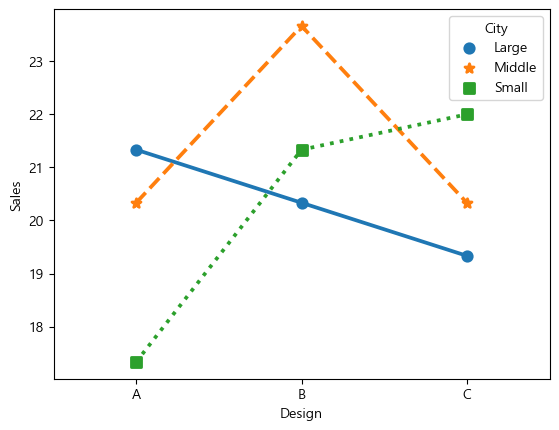

In [27]:
sb.pointplot( data = df,
              x = df.Design, y = df.Sales,
              hue = df.City,
              ci = 0, markers=['o','*','s'], linestyles=['-','--',':'])
plt.show()

# =================================

# 공분산 분석

In [28]:
df =  pd.read_csv(r'C:\Users\Boanerges\GitHub\rawdata\ancova.csv',
                  index_col = 'ID')
df

,Group,Age,Score
ID,,,
1,1,31,30
2,1,28,0
3,1,25,10
4,1,34,40
5,1,39,55
6,1,26,20
7,1,30,65
8,1,26,5
9,1,31,40


In [29]:
df.groupby('Group').agg( {'Score' : [ 'mean', 'std', 'min', 'max' ] } )

Score                   
       mean        std min max
Group                         
1      26.5  23.219963   0  65
2      59.8  33.235857   5  99

In [30]:
df.groupby('Age').agg( {'Score' : [ 'mean', 'std', 'min', 'max' ] } )

Score                   
          mean        std min max
Age                              
23    0.000000        NaN   0   0
25   10.000000        NaN  10  10
26   12.500000  10.606602   5  20
27    5.000000        NaN   5   5
28    0.000000        NaN   0   0
29   25.000000        NaN  25  25
30   65.000000        NaN  65  65
31   53.333333  32.145503  30  90
32   68.000000  38.431758  25  99
33   50.000000        NaN  50  50
34   40.000000        NaN  40  40
36   62.500000   3.535534  60  65
39   55.000000        NaN  55  55
41   99.000000        NaN  99  99

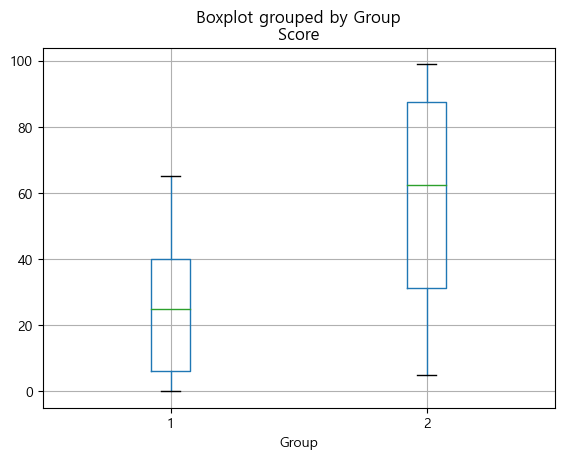

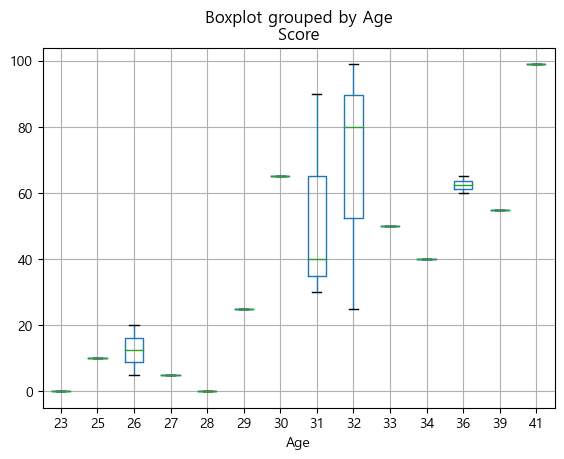

In [31]:
df.boxplot('Score', by='Group')
df.boxplot('Score', by='Age')
plt.show()

In [32]:
df.groupby('Group').agg( {'Age' : [ 'mean', 'std', 'min', 'max' ] } )

Age                  
       mean       std min max
Group                        
1      29.3  4.762119  23  39
2      32.9  3.956710  27  41

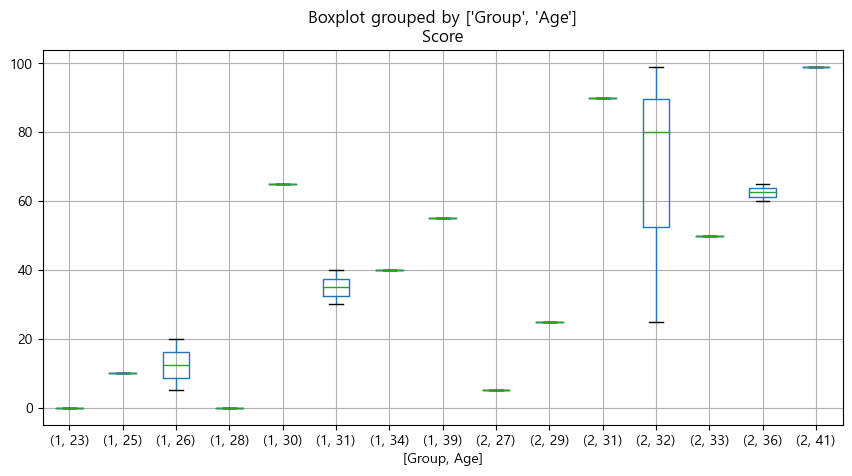

In [33]:
df.boxplot('Score', by=['Group', 'Age'],
           figsize=(10, 5) )
plt.show()

## 공분산 분석 모형의 가정

- 공변량 x와 반응변수 y는 선형적인(체계적인 증감의) 관계가 있다.  
  - 선형적이 아니라면 공변량을 적절한 구간으로 나누어 블록으로 간주하여 분석하거나 적절한 비선형 모형을 고려하여 분석해야 한다.  


- 공변량에 대한 기울기가 두 집단에서 동일하다.
  - 기울기의 동일성을 가정할 수 없다면 서로 다른 기울기를 가지는 일반선형모형을 고려하여 분석해야 한다.

## 공분산 분석

In [34]:
# statsmodels 패키지를 사용하여 분산 분석 실시

# 회귀모델 생성 및 적합
fit_model = ols( 'Score ~ C(Group)+Age', data = df ).fit()
# Fertil 의 데이터가 숫자형이라면 ols 함수 사용 시,
# C() 연산자를 사용하여 범주형 변수로 지정해주는 작업이 필요하다.
# 이 과정을 생략하고 싶다면 처음부터 데이터 타입을 문자형으로 변경하고 나서 분석을 시작하면 된다.


# 분산분석 수행
anova_lm(fit_model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,3757.815275,1.0,7.513449,0.013926
C(Group),1352.710921,1.0,2.704636,0.118420
Age,6291.631565,1.0,12.579610,0.002479
Residual,8502.468435,17.0,NaN,NaN
